In [1]:
import polars as pl
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pred = pl.col("predicted_value")
target = pl.col("activities.standard_value")
error = (pred - target).abs().alias("absolute_error")
squared_error = error.pow(2).alias("squared_error")
rmse = squared_error.mean().sqrt().alias("rmse")
pcc = pl.corr(pred, target).alias("pcc")
spearman = pl.corr(pred, target, method="spearman").alias("spearman")

In [3]:
metadata = pl.read_csv("../data/processed/kinodata3d_metadata.csv")

In [4]:
folds = pl.read_csv("../data/paper_models/fold_info.csv")

test_predictions = []
for file in Path("../data/paper_models/").glob("*test_clean.csv"):
    model, split_type = file.stem.split("_")[0], file.stem.split("_")[1]
    df = pl.read_csv(file).with_columns(
        pl.lit(model).alias("model"),
        pl.lit(split_type).alias("split_type"),
    )
    test_predictions.append(df)
test_predictions = (
    pl.concat(test_predictions)
    .join(
        folds.filter(pl.col.dataset == "test"),
        on=["activity_id", "model", "split_type"],
        how="left",
    )
    .join(
        metadata,
        on="activity_id",
        how="left",
    )
    .with_columns(error, squared_error)
)

test_predictions.write_csv("../data/processed/test_predictions.csv")

In [5]:
df_rmse = test_predictions.group_by("split_type", "model", "split_fold").agg(rmse)
df_spearman = test_predictions.group_by("split_type", "model", "split_fold").agg(
    spearman
)
df_pcc = test_predictions.group_by("split_type", "model", "split_fold").agg(pcc)

### PCC

Text(0.5, 1.0, '5-fold pocket split')

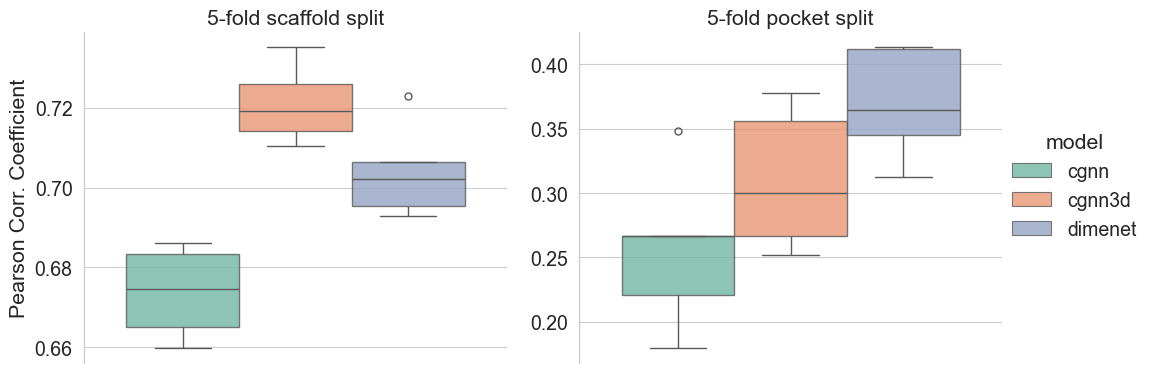

In [6]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.6)

grid = sns.catplot(
    df_pcc,
    hue="model",
    hue_order=["cgnn", "cgnn3d", "dimenet"],
    y="pcc",
    col="split_type",
    col_order=["scaffold", "pocket"],
    kind="box",
    palette="Set2",
    boxprops=dict(alpha=0.8),
    sharey=False,
    legend=True,
    height=4,
    aspect=1.3,
)
# grid.map_dataframe(
#     sns.stripplot,
#     y="pcc",
#     hue="model",
#     dodge=True,
#     palette="Set2",
#     edgecolor="black",
#     linewidth=1,
# )
sns.despine(bottom=True)

grid.axes[0][0].set_title("5-fold scaffold split")
grid.axes[0][0].set_ylabel("Pearson Corr. Coefficient")
grid.axes[0][1].set_title("5-fold pocket split")
# plt.legend(title="Model", labels=["CGNN", "CGNN-3D", "DimeNet++"])

### RMSE

Text(0.5, 1.0, '5-fold pocket split')

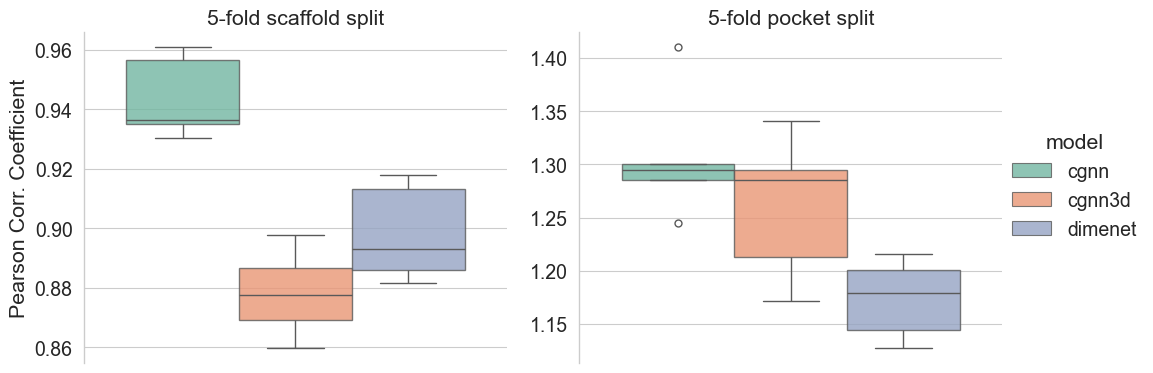

In [7]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.6)

grid = sns.catplot(
    df_rmse,
    hue="model",
    hue_order=["cgnn", "cgnn3d", "dimenet"],
    y="rmse",
    col="split_type",
    col_order=["scaffold", "pocket"],
    kind="box",
    palette="Set2",
    boxprops=dict(alpha=0.8),
    sharey=False,
    legend=True,
    height=4,
    aspect=1.3,
)
# grid.map_dataframe(
#     sns.stripplot,
#     y="pcc",
#     hue="model",
#     dodge=True,
#     palette="Set2",
#     edgecolor="black",
#     linewidth=1,
# )
sns.despine(bottom=True)

grid.axes[0][0].set_title("5-fold scaffold split")
grid.axes[0][0].set_ylabel("Pearson Corr. Coefficient")
grid.axes[0][1].set_title("5-fold pocket split")
# plt.legend(title="Model", labels=["CGNN", "CGNN-3D", "DimeNet++"])

### Spearman

Text(0.5, 1.0, '5-fold pocket split')

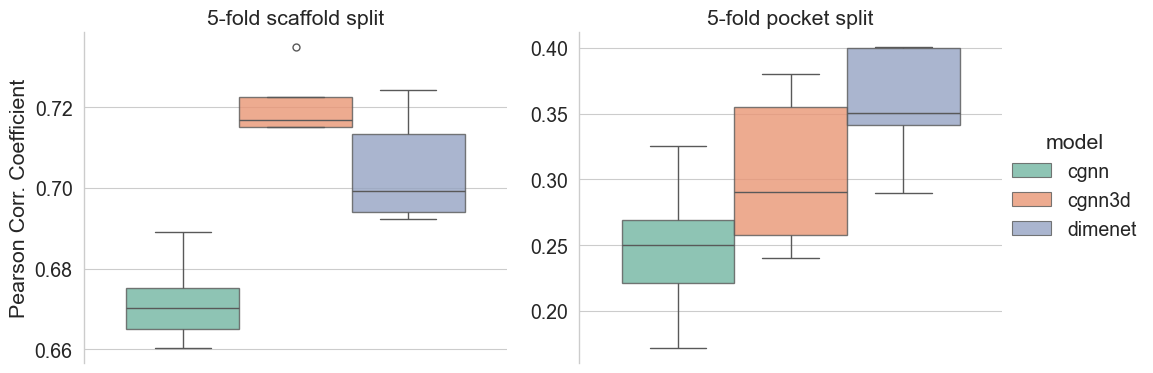

In [8]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.6)

grid = sns.catplot(
    df_spearman,
    hue="model",
    hue_order=["cgnn", "cgnn3d", "dimenet"],
    y="spearman",
    col="split_type",
    col_order=["scaffold", "pocket"],
    kind="box",
    palette="Set2",
    boxprops=dict(alpha=0.8),
    sharey=False,
    legend=True,
    height=4,
    aspect=1.3,
)
# grid.map_dataframe(
#     sns.stripplot,
#     y="pcc",
#     hue="model",
#     dodge=True,
#     palette="Set2",
#     edgecolor="black",
#     linewidth=1,
# )
sns.despine(bottom=True)

grid.axes[0][0].set_title("5-fold scaffold split")
grid.axes[0][0].set_ylabel("Pearson Corr. Coefficient")
grid.axes[0][1].set_title("5-fold pocket split")
# plt.legend(title="Model", labels=["CGNN", "CGNN-3D", "DimeNet++"])